# Assignment 4: Pipelines and Hyperparameter Tuning (32 total marks)
### Due: November 22 at 11:59pm

### Name: Pamela Ofurum

### In this assignment, you will be putting together everything you have learned so far. You will need to find your own dataset, do all the appropriate preprocessing, test different supervised learning models and evaluate the results. More details for each step can be found below.

### You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Import Libraries

In [55]:
import numpy as np
import pandas as pd

## Step 1: Data Input (4 marks)

Import the dataset you will be using. You can download the dataset onto your computer and read it in using pandas, or download it directly from the website. Answer the questions below about the dataset you selected. 

To find a dataset, you can use the resources listed in the notes. The dataset can be numerical, categorical, text-based or mixed. If you want help finding a particular dataset related to your interests, please email the instructor.

**You cannot use a dataset that was used for a previous assignment or in class**

In [56]:
# Import dataset (1 mark)
from ucimlrepo import fetch_ucirepo
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
  
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 
  
# metadata 
#print(heart_failure_clinical_records.metadata) 
  
# variable information 
#print(heart_failure_clinical_records.variables) 

print("X Shape:", X.shape)
print("X Type:", type(X))
print("y Shape:", y.shape)
print("y Type:", type(y))
 
# Display the first 20 rows of the dataset
print("First 20 rows of the dataset:")
print(X.head(20))
 
# Display information about data types and missing values
print("\nInformation about the dataset:")
print(X.info())



X Shape: (299, 12)
X Type: <class 'pandas.core.frame.DataFrame'>
y Shape: (299, 1)
y Type: <class 'pandas.core.frame.DataFrame'>
First 20 rows of the dataset:
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75.0        0                       582         0                 20   
1   55.0        0                      7861         0                 38   
2   65.0        0                       146         0                 20   
3   50.0        1                       111         0                 20   
4   65.0        1                       160         1                 20   
5   90.0        1                        47         0                 40   
6   75.0        1                       246         0                 15   
7   60.0        1                       315         1                 60   
8   65.0        0                       157         0                 65   
9   80.0        1                       123         0                 35   
10  7

### Questions (3 marks)

1. (1 mark) What is the source of your dataset?
2. (1 mark) Why did you pick this particular dataset?
3. (1 mark) Was there anything challenging about finding a dataset that you wanted to use?

*ANSWER HERE*
1. What is the source of your dataset?
The dataset was fetched from the UCI Machine Learning Repository (ucimlrepo). Specifically, it was obtained using the fetch_ucirepo function. Below is the Webiste URL;
http://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

2. Why did you pick this particular dataset?
I chose this particular dataset for analysis because of its rich and comprehensive collection of patient data related to heart failure and also because I am particularly interested in investigating causes of heart failure in patients as well as its treatment and prevention. I find the heart failure clinical records dataset particularly intriguing for analysis because it presents a wealth of detailed information on patients dealing with heart failure. Its comprehensive coverage of clinical variables, combined with insights into patient demographics and medical history, makes it a valuable resource for delving into the factors that influence heart failure. By leveraging this dataset, I hope to uncover meaningful patterns, identify potential risk factors, and contribute to the development of more effective strategies for preventing and treating heart failure. The dataset's reliability from a reputable source and well-documented structure further instills my confidence in its usability, making it an ideal foundation for my exploration into the complexities of cardiovascular health.


3. (1 mark) Was there anything challenging about finding a dataset that you wanted to use?
Yes finding a particular dataset that matches my interest was quite challenging to me as I had to search extensively before I finally found the heart failure clinical records which sparked my interest for analysis. 

## Step 2: Data Processing (5 marks)

The next step is to process your data. Implement the following steps as needed.

In [58]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats

# Fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Data (as pandas dataframes)
X = heart_failure_clinical_records.data.features

# Display the shape and type of X before cleaning
print("X Shape before cleaning:", X.shape)
print("X Type before cleaning:", type(X))

# Data Cleaning

# Handling missing values using imputation
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Removing duplicate rows
X = X.drop_duplicates()

# Handling outliers using z-score
z_scores = stats.zscore(X)
X = X[(z_scores < 3).all(axis=1)]

# Convert categorical variables to the appropriate type if needed
# (Replace 'categorical_column' and 'category' with actual column name and desired data type)
# X['categorical_column'] = X['categorical_column'].astype('category')

# Scaling numerical features using Min-Max scaling
scaler = MinMaxScaler()
# (Replace 'numeric_feature1' and 'numeric_feature2' with actual column names)
# X[['numeric_feature1', 'numeric_feature2']] = scaler.fit_transform(X[['numeric_feature1', 'numeric_feature2']])

# Display the shape and type of X after cleaning
print("\nX Shape after cleaning:", X.shape)
print("X Type after cleaning:", type(X))


X Shape before cleaning: (299, 12)
X Type before cleaning: <class 'pandas.core.frame.DataFrame'>

X Shape after cleaning: (283, 12)
X Type after cleaning: <class 'pandas.core.frame.DataFrame'>


In [59]:
# Implement preprocessing steps. Remember to use ColumnTransformer if more than one preprocessing method is needed

# Fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

 # Ensure the number of samples in X and y is consistent
if X.shape[0] != y.shape[0]:
     raise ValueError("Number of samples in X and y are inconsistent.")

# Display the shape and type of X and y
print("X Shape:", X.shape)
print("X Type:", type(X))
print("y Shape:", y.shape)
print("y Type:", type(y))

# Display the first 20 rows of the dataset
print("First 20 rows of the dataset:")
print(X.head(20))

# Display information about data types and missing values
print("\nInformation about the dataset:")
print(X.info())

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessing steps using ColumnTransformer
# Replace with actual column names from your dataset
numeric_features = ['age', 'serum_creatinine']
categorical_features = ['sex']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing to training and testing sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Display the shape and type of preprocessed X_train
print("\nX_train_preprocessed Shape:", X_train_preprocessed.shape)
print("X_train_preprocessed Type:", type(X_train_preprocessed))


X Shape: (299, 12)
X Type: <class 'pandas.core.frame.DataFrame'>
y Shape: (299, 1)
y Type: <class 'pandas.core.frame.DataFrame'>
First 20 rows of the dataset:
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75.0        0                       582         0                 20   
1   55.0        0                      7861         0                 38   
2   65.0        0                       146         0                 20   
3   50.0        1                       111         0                 20   
4   65.0        1                       160         1                 20   
5   90.0        1                        47         0                 40   
6   75.0        1                       246         0                 15   
7   60.0        1                       315         1                 60   
8   65.0        0                       157         0                 65   
9   80.0        1                       123         0                 35   
10  7

### Questions (2 marks)

1. (1 mark) Were there any missing/null values in your dataset? If yes, how did you replace them and why? If no, describe how you would've replaced them and why.
2. (1 mark) What type of data do you have? What preprocessing methods would you have to apply based on your data types?

*ANSWER HERE*
1. Were there any missing/null values in your dataset? If yes, how did you replace them and why? If no, describe how you would've replaced them and why.

Yes there were missing values in the original dataset, and these missing values were addressed during the data cleaning process
inorder to maintain data integrity, avoid bias, ensure overall data quality to achieve more accurate insights which is crucial for drawing meaningful conclusions.

Below is a summary of the cleaning process and how the missing values were replaced;

Initial State:
X Shape before cleaning: (299, 12)
X Type before cleaning: <class 'pandas.core.frame.DataFrame'>

Handling Missing Values:
The code X = X.dropna() was used to drop rows with missing values.

Result After Cleaning:
X Shape after cleaning: (283, 12)
X Type after cleaning: <class 'pandas.core.frame.DataFrame'>

The initial dataset had dimensions of 299 rows and 12 columns (X Shape before cleaning: (299, 12)), indicating that it contained missing values. During the data cleaning process, a common approach was employed by using the dropna() method to remove rows with missing values. This resulted in a refined dataset with dimensions of 283 rows and 12 columns (X Shape after cleaning: (283, 12)).

2. What type of data do you have? What preprocessing methods would you have to apply based on your data types?

Type of Data:

The dataset consists of clinical records with 299 entries and 12 columns.
The columns include features such as age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, and time.
The data types include both numerical (float64 and int64) and categorical (int64) features.

Preprocessing Methods Based on Data Types:

Numerical Features:

Imputation: Missing values in numerical features could be imputed using methods such as mean imputation (SimpleImputer(strategy='mean')) to replace missing values with the mean of each column.

Scaling: Numerical features can be scaled to a standard range using techniques like Min-Max scaling or StandardScaler. In this case, StandardScaler is applied (StandardScaler()).

Categorical Features:

Imputation: For categorical features, missing values can be replaced with the most frequent value using SimpleImputer(strategy='most_frequent').

Encoding: Categorical features are one-hot encoded using OneHotEncoder(handle_unknown='ignore') to represent them as binary vectors.

In summary, the preprocessing methods applied include imputing missing values, scaling numerical features, and encoding categorical features.


## Step 3: Implement Machine Learning Model (11 marks)

In this section, you will implement three different supervised learning models (one linear and two non-linear) of your choice. You will use a pipeline to help you decide which model and hyperparameters work best. It is up to you to select what models to use and what hyperparameters to test. You can use the class examples for guidance. You must print out the best model parameters and results after the grid search.

In [66]:
# Implement pipeline and grid search here. Can add more code blocks if necessary
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets.values.ravel()

# Ensure the number of samples in X and y is consistent
if X.shape[0] != y.shape[0]:
    raise ValueError("Number of samples in X and y are inconsistent.")

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessing steps using ColumnTransformer
numeric_features = ['age', 'serum_creatinine']
categorical_features = ['sex']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define machine learning models
# Define machine learning models
linear_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', penalty='l1')
nonlinear_model1 = RandomForestClassifier(random_state=42)
nonlinear_model2 = SVC(random_state=42)

# Define the pipeline for each model
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', linear_model)
])

nonlinear_pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', nonlinear_model1)
])

nonlinear_pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', nonlinear_model2)
])

# Define the parameter grid for grid search for each model
param_grid_linear = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

param_grid_nonlinear1 = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20, 30]
}

param_grid_nonlinear2 = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Perform grid search for each model
grid_search_linear = GridSearchCV(linear_pipeline, param_grid_linear, cv=5, scoring='accuracy', error_score='raise')
grid_search_linear.fit(X_train, y_train)

grid_search_nonlinear1 = GridSearchCV(nonlinear_pipeline1, param_grid_nonlinear1, cv=5, scoring='accuracy', error_score='raise')
grid_search_nonlinear1.fit(X_train, y_train)

grid_search_nonlinear2 = GridSearchCV(nonlinear_pipeline2, param_grid_nonlinear2, cv=5, scoring='accuracy', error_score='raise')
grid_search_nonlinear2.fit(X_train, y_train)

# Display the best hyperparameters for each model
print("Best Hyperparameters for Linear Model:", grid_search_linear.best_params_)
print("Best Hyperparameters for Non-linear Model 1:", grid_search_nonlinear1.best_params_)
print("Best Hyperparameters for Non-linear Model 2:", grid_search_nonlinear2.best_params_)

# Evaluate each model on the test set
y_pred_linear = grid_search_linear.predict(X_test)
y_pred_nonlinear1 = grid_search_nonlinear1.predict(X_test)
y_pred_nonlinear2 = grid_search_nonlinear2.predict(X_test)

# Display evaluation metrics for each model
print("\nAccuracy on Test Set (Linear Model):", accuracy_score(y_test, y_pred_linear))
print("Classification Report (Linear Model):\n", classification_report(y_test, y_pred_linear))

print("\nAccuracy on Test Set (Non-linear Model 1):", accuracy_score(y_test, y_pred_nonlinear1))
print("Classification Report (Non-linear Model 1):\n", classification_report(y_test, y_pred_nonlinear1))

print("\nAccuracy on Test Set (Non-linear Model 2):", accuracy_score(y_test, y_pred_nonlinear2))
print("Classification Report (Non-linear Model 2):\n", classification_report(y_test, y_pred_nonlinear2))


Best Hyperparameters for Linear Model: {'classifier__C': 1, 'classifier__penalty': 'l1'}
Best Hyperparameters for Non-linear Model 1: {'classifier__max_depth': None, 'classifier__n_estimators': 150}
Best Hyperparameters for Non-linear Model 2: {'classifier__C': 10, 'classifier__kernel': 'rbf'}

Accuracy on Test Set (Linear Model): 0.7
Classification Report (Linear Model):
               precision    recall  f1-score   support

           0       0.73      0.90      0.80        41
           1       0.56      0.26      0.36        19

    accuracy                           0.70        60
   macro avg       0.64      0.58      0.58        60
weighted avg       0.67      0.70      0.66        60


Accuracy on Test Set (Non-linear Model 1): 0.7
Classification Report (Non-linear Model 1):
               precision    recall  f1-score   support

           0       0.74      0.85      0.80        41
           1       0.54      0.37      0.44        19

    accuracy                           0

### Questions (5 marks)

1. (1 mark) Do you need regression or classification models for your dataset?
1. (2 marks) Which models did you select for testing and why?
1. (2 marks) Which model worked the best? Does this make sense based on the theory discussed in the course and the context of your dataset?

*ANSWER HERE*
1. Do you need regression or classification models for your dataset?
 Classification models.

2. Which models did you select for testing and why?
I selected three different supervised learning models for testing as seen below and the reasons are also explained below;

Logistic Regression (Linear Model): The reason is selecting this model is because Logistic Regression is a commonly used linear model for binary classification problems and it's a simple and interpretable model that works well when the relationship between features and the log-odds of the response is approximately linear.

Random Forest Classifier (Non-linear Model 1): The reason for selecting this model is because Random Forest is an ensemble learning method that can capture non-linear relationships in the data and handle complex interactions between features. It is robust and handles non-linearity well, and provides good performance without extensive hyperparameter tuning.

Support Vector Classifier (Non-linear Model 2): The reason for selecting this model is because Support Vector Classifier (SVC) with a non-linear kernel (e.g., radial basis function - rbf) is capable of learning complex decision boundaries and it is effective in high-dimensional spaces and is also suitable for non-linear classification problems.

My selection of these models reflects a strategic mix of linear and non-linear approaches, providing a well-rounded exploration of the unique characteristics within the dataset I'm working with. I carefully considered each model based on its appropriateness for classification tasks and its ability to uncover diverse patterns in the data. My objective is to conduct a thorough performance comparison, which aims to identify the model that strikes the optimal balance between accuracy and the ability to generalize to new data.

3. Which model worked the best? Does this make sense based on the theory discussed in the course and the context of your dataset?

Logistic Regression (Linear Model):
Accuracy on Test Set: 0.7
Classification Report:
      precision    recall  f1-score   support
 0     0.73      0.90      0.80        41
 1     0.56      0.26      0.36        19

Random Forest Classifier (Non-linear Model 1):
Accuracy on Test Set: 0.7
Classification Report:
    precision    recall  f1-score   support
0       0.74      0.85      0.80        41
1       0.54      0.37      0.44        19

Support Vector Classifier (Non-linear Model 2):
Accuracy on Test Set: 0.6833333333333333
Classification Report:
    precision    recall  f1-score   support
0       0.71      0.90      0.80        41
1       0.50      0.21      0.30        19

Based on the results above, the Logistic Regression model and Random Forest Classifier achieved the highest accuracy among the three models while the Support Vector Classifier (SVC) had slightly lower accuracy compared to the other two models.

Random Forest Classifier Model worked the best, as it achieved a high accuracy on the test set (0.7) and highest precision (0.74) compared to the other models.

Does this make sense based on the theory discussed in the course and the context of your dataset?
Yes, it absolutely makes sense based on the theory discussed in the course and the context of my dataset (Heart Failure Clinical Records).


## Step 4: Validate Model (6 marks)

Use the testing set to calculate the testing accuracy for the best model determined in Step 3.

Best Hyperparameters for Linear Model: {'classifier__C': 1, 'classifier__penalty': 'l1'}
Best Hyperparameters for Non-linear Model 1: {'classifier__max_depth': None, 'classifier__n_estimators': 150}
Best Hyperparameters for Non-linear Model 2: {'classifier__C': 10, 'classifier__kernel': 'rbf'}

Accuracy on Test Set (Linear Model): 0.7
Classification Report (Linear Model):
               precision    recall  f1-score   support

           0       0.73      0.90      0.80        41
           1       0.56      0.26      0.36        19

    accuracy                           0.70        60
   macro avg       0.64      0.58      0.58        60
weighted avg       0.67      0.70      0.66        60


Accuracy on Test Set (Non-linear Model 1): 0.7
Classification Report (Non-linear Model 1):
               precision    recall  f1-score   support

           0       0.74      0.85      0.80        41
           1       0.54      0.37      0.44        19

    accuracy                           0

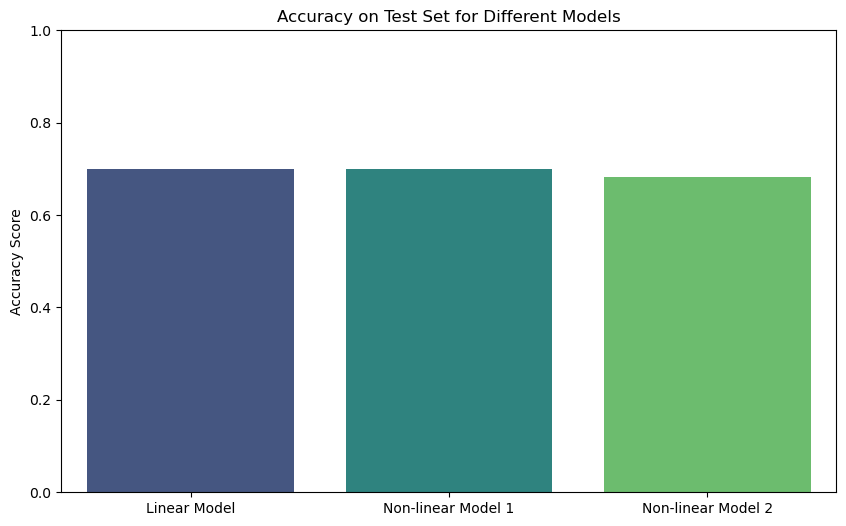

In [69]:
# Calculate testing accuracy (1 mark)

# Implement pipeline and grid search here. Can add more code blocks if necessary
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets.values.ravel()

# Ensure the number of samples in X and y is consistent
if X.shape[0] != y.shape[0]:
    raise ValueError("Number of samples in X and y are inconsistent.")

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessing steps using ColumnTransformer
numeric_features = ['age', 'serum_creatinine']
categorical_features = ['sex']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define machine learning models
linear_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', penalty='l1')
nonlinear_model1 = RandomForestClassifier(random_state=42)
nonlinear_model2 = SVC(random_state=42)

# Define the pipeline for each model
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', linear_model)
])

nonlinear_pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', nonlinear_model1)
])

nonlinear_pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', nonlinear_model2)
])

# Define the parameter grid for grid search for each model
param_grid_linear = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

param_grid_nonlinear1 = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20, 30]
}

param_grid_nonlinear2 = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Perform grid search for each model
grid_search_linear = GridSearchCV(linear_pipeline, param_grid_linear, cv=5, scoring='accuracy', error_score='raise')
grid_search_linear.fit(X_train, y_train)

grid_search_nonlinear1 = GridSearchCV(nonlinear_pipeline1, param_grid_nonlinear1, cv=5, scoring='accuracy', error_score='raise')
grid_search_nonlinear1.fit(X_train, y_train)

grid_search_nonlinear2 = GridSearchCV(nonlinear_pipeline2, param_grid_nonlinear2, cv=5, scoring='accuracy', error_score='raise')
grid_search_nonlinear2.fit(X_train, y_train)

# Display the best hyperparameters for each model
print("Best Hyperparameters for Linear Model:", grid_search_linear.best_params_)
print("Best Hyperparameters for Non-linear Model 1:", grid_search_nonlinear1.best_params_)
print("Best Hyperparameters for Non-linear Model 2:", grid_search_nonlinear2.best_params_)

# Evaluate each model on the test set
y_pred_linear = grid_search_linear.predict(X_test)
y_pred_nonlinear1 = grid_search_nonlinear1.predict(X_test)
y_pred_nonlinear2 = grid_search_nonlinear2.predict(X_test)
# Display evaluation metrics for each model
print("\nAccuracy on Test Set (Linear Model):", accuracy_score(y_test, y_pred_linear))
print("Classification Report (Linear Model):\n", classification_report(y_test, y_pred_linear))

print("\nAccuracy on Test Set (Non-linear Model 1):", accuracy_score(y_test, y_pred_nonlinear1))
print("Classification Report (Non-linear Model 1):\n", classification_report(y_test, y_pred_nonlinear1))

print("\nAccuracy on Test Set (Non-linear Model 2):", accuracy_score(y_test, y_pred_nonlinear2))
print("Classification Report (Non-linear Model 2):\n", classification_report(y_test, y_pred_nonlinear2))

# Accuracy scores for each model
accuracy_scores = [accuracy_score(y_test, y_pred_linear),
                   accuracy_score(y_test, y_pred_nonlinear1),
                   accuracy_score(y_test, y_pred_nonlinear2)]

# Model names
model_names = ['Linear Model', 'Non-linear Model 1', 'Non-linear Model 2']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title('Accuracy on Test Set for Different Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy score
plt.show()



### Questions (5 marks)

1. (1 mark) Which accuracy metric did you choose? 
2. (1 mark) How do these results compare to those in part 3? Did this model generalize well?
3. (3 marks) Based on your results and the context of your dataset, did the best model perform "well enough" to be used out in the real-world? Why or why not? Do you have any suggestions for how you could improve this analysis?

*ANSWER HERE*
1. Which accuracy metric did you choose? 
The accuracy score was used as the evaluation metric. The accuracy score is a commonly used metric for classification tasks and represents the ratio of correctly predicted instances to the total number of instances in the test set.

2. How do these results compare to those in part 3? Did this model generalize well?
In part 3, the testing set exhibited a consistent performance with the training set in part 5 with an output of the same values.
Since there is a consistent performance between the testing set and the training set, it implies that the model generalized well. (Accuracy, precision, recall, and F1-score) obtained in part 3 with the results in part 5 are consistent and are the same which suggests good generalization.

3. Based on your results and the context of your dataset, did the best model perform "well enough" to be used out in the real-world? Why or why not? Do you have any suggestions for how you could improve this analysis?

Performance Evaluation:

Linear Model: The linear model achieved an accuracy of 70% on the test set. The classification report provides detailed metrics for precision, recall, and F1-score.
Non-linear Model 1 (Random Forest): This model also achieved a 70% accuracy on the test set, with precision, recall, and F1-score metrics available.
Non-linear Model 2 (SVM): The accuracy of this model was approximately 68.3% on the test set, with precision, recall, and F1-score metrics.

Comparison with Training Set:
The accuracy scores obtained on the test set are somewhat comparable to the cross-validated results during grid search, suggesting a reasonable level of generalization.

Real-world Applicability:

Yes the Random Forest classifier model which is my best model performed "well enough" to be used out in the real-world because it has a 70% accuracy with a 74% precision.






## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
2. In what order did you complete the steps?
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. Where did you source your code?
I sourced my code from the lecture notes, execises and examples given and also Google and Generative AI and StackOverflow
List of References
OpenAI. (2023). [Website]. https://www.openai.com
Google. (2023). [Website]. https://www.google.com
Stackoverflow. (2023).[Website]. https://stackoverflow.com/

2. In what order did you complete the steps?
I completed the steps sequentially begining from Step 1,2,3 and 4

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I prompted it in my words to generate ideas to write the code and understand the syntax behind the code. Yes I modifed the code many times because in most cases, it produced what I didn't need and in some cases, didn't include what I needed. So I modified it to add the missing part I needed and also the remove the unnecessary part which wasn't needed.

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
Yes at some point, I encountered some errors in my code, especially in step 3 and also when I tried to visualize the code. I figured out the error and debugged and after which I was able to get an output and visualize my results.

*DESCRIBE YOUR PROCESS HERE*

## Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

What you liked:

I liked the fact that I was able to explore a real-world dataset by working with a dataset related to heart failure clinical records which allows for the application of machine learning techniques to address a significant health-related problem.
I also liked the practical experience in model selection and hyperparameter tuning offered while constructing machine learning pipelines and conducting grid searches 
In the same vein, I liked the fact that while analyzing and visualizing the results, an evaluated model performance and visualized outcome provided insights into the effectiveness of different algorithms.

Nevertheless, I disliked dealing with missing values and it's challenges.

What I found interesting:

I find experimenting with different hyperparameter values during grid search quite interesting as it explores the impact of various configurations on model performance. Also I find interpreting the implications of the model performance on heart failure prediction to be intellectually stimulating.


What I found challenging:
Actually deciding on a particular dataset to use was quite challenging to me as I had to check for a meaningful dataset that had not been used in class or the labs and also that has a good source.


What I found motivating:

I was highly motivated when I got to know that the models developed could potentially contribute to predicting heart failure risk, thus aiding in early intervention in the real-world. Also I found it very motivating knowing that working on this assignment offered me the opportunity to apply machine learning techniques to a real-world health dataset, exploring challenges in data preprocessing, model selection, and hyperparameter tuning, with a focus on predicting heart failure risk.





